# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The summary describes a dataset collected from a Portuguese bank's phone-based marketing campaigns for a long-term deposit product. Here are the key points:

```Marketing channel```: Primarily phone calls with agents, potentially supplemented by online banking info.

```Campaign period```: May 2008 to November 2010 (17 campaigns).

```Data size```: 79,354 contacts.

```Target product```: Long-term deposit with good interest rates.

```Success rate```: 8% (6,499 successes).

```Additional data```: A large number of attributes were collected for each contact.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [82]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The goal was to increase efficiency of directed campaigns for long-term deposit subscriptions by reducing the number of contacts to do.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [83]:
from sklearn.calibration import LabelEncoder


df_clean = df.copy()
df_clean['job'] = LabelEncoder().fit_transform(df['job'])
df_clean['marital'] = LabelEncoder().fit_transform(df['marital'])
df_clean['education'] = LabelEncoder().fit_transform(df['education'])
df_clean['default'] = LabelEncoder().fit_transform(df['default'])
df_clean['housing'] = LabelEncoder().fit_transform(df['housing'])
df_clean['loan'] = LabelEncoder().fit_transform(df['loan'])
df_clean['contact'] = LabelEncoder().fit_transform(df['contact'])
df_clean['month'] = LabelEncoder().fit_transform(df['month'])
df_clean['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df_clean['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])
df_clean['y'] = LabelEncoder().fit_transform(df['y'])

df_clean.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [84]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [85]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [86]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

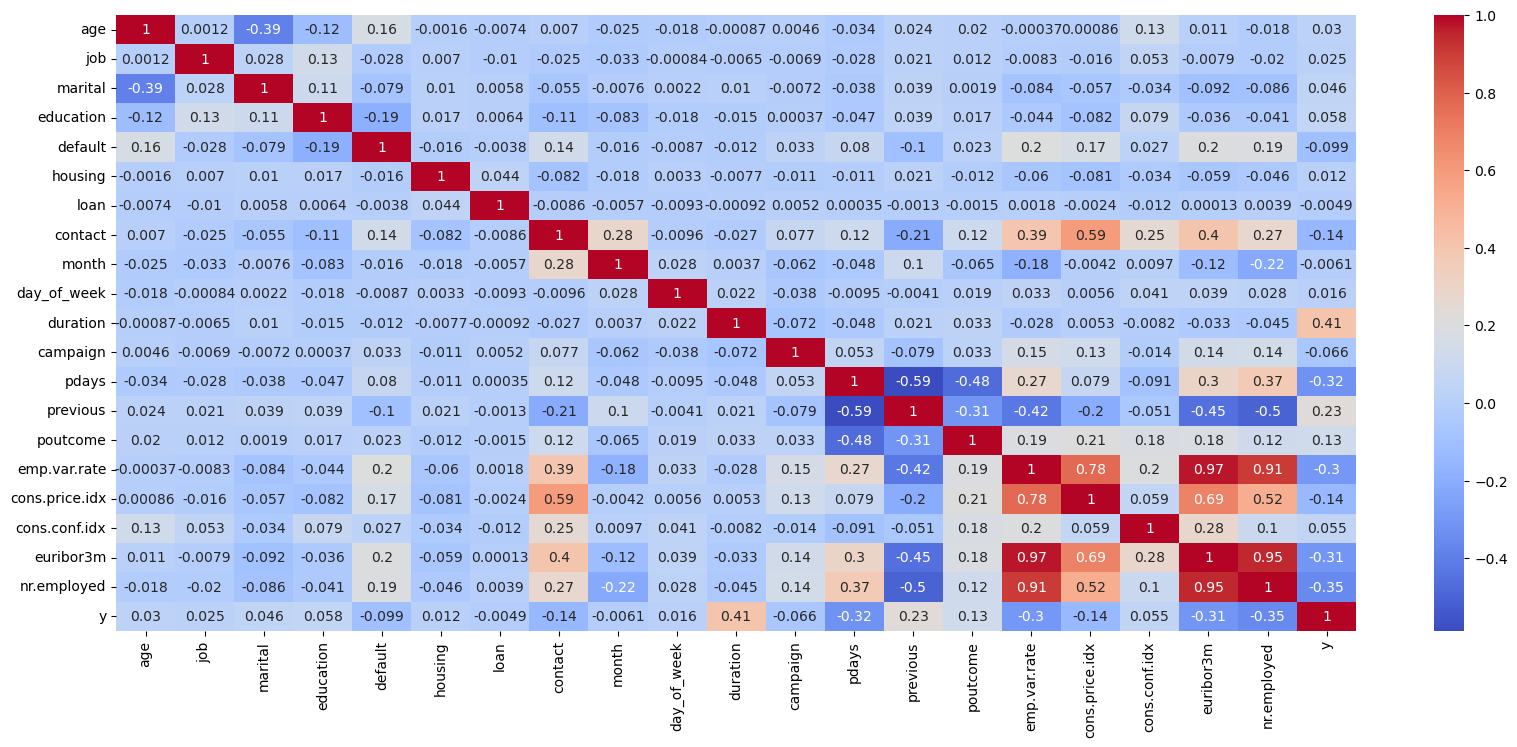

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_clean is your DataFrame
plt.figure(figsize=(20,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()


From the correlation matrix heat map above we see market parametrs are stronger in deriving the outcome rather than individual characters.

In [88]:
df_clean.corr()['y'].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
loan             -0.004909
month            -0.006065
campaign         -0.066357
default          -0.099352
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [89]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
X = df_clean.drop('y', axis=1)
y = df_clean['y']
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [90]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test datasets

# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy.fit(X_train, y_train)

# Get the baseline performance for the training set
y_pred_train = dummy.predict(X_train)
baseline_train = accuracy_score(y_train, y_pred_train)

# Get the baseline performance for the test set
y_pred_test = dummy.predict(X_test)
baseline_test = accuracy_score(y_test, y_pred_test)

print(f'Baseline accuracy for training set: {baseline_train * 100:.2f}%')
print(f'Baseline accuracy for test set: {baseline_test * 100:.2f}%')

Baseline accuracy for training set: 88.72%
Baseline accuracy for test set: 88.76%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Assuming X_train and y_train are your data
# X_train, y_train = ...

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)


### Problem 9: Score the Model

What is the accuracy of your model?

In [92]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 91.03%
Test Accuracy: 91.02%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [93]:
import time
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, knn.predict(X_train))

train_time = end_time - start_time

print(f'Train Time: {train_time} seconds')
print(f'train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Train Time: 0.007720232009887695 seconds
train Accuracy: 94.00%
Test Accuracy: 89.51%


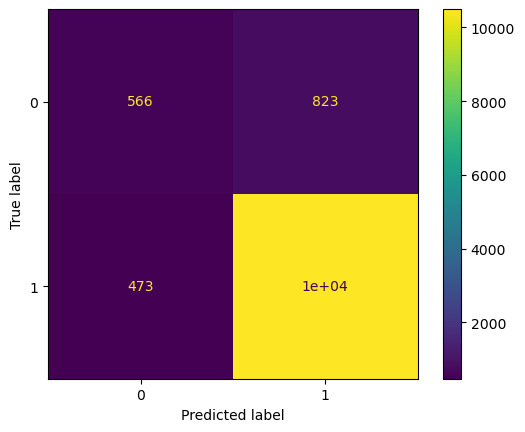

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import set_config

# Assuming knn is your trained model and X_test, y_test are your test data
confusion_mat = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1' ])
disp.plot()
plt.show()

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Assuming X_train and y_train are your data
# X_train, y_train = ...

# Create a Logistic Regression model
model = LogisticRegression( max_iter=1000,random_state=42)
start_time = time.time()
# Train the model
model.fit(X_train, y_train)
end_time = time.time()
# Predict on the training data
y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, model.predict(X_test))

train_time = end_time - start_time
print(f'train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Train Time: {train_time} seconds')

train Accuracy: 91.03%
Test Accuracy: 91.02%
Train Time: 0.514225959777832 seconds


In [97]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(max_depth=2)
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

print(f'Train Time: {train_time} seconds')
# Use the classifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, clf.predict(X_train))


print(f'train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



Train Time: 0.028266429901123047 seconds
train Accuracy: 90.35%
Test Accuracy: 90.35%


In [98]:
from sklearn import svm


# Create a SVM Classifier
clf = svm.SVC(kernel='linear') 

# Train the model using the training sets
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
# Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
train_time = end_time - start_time

print(f'train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Train Time: {train_time} seconds')

train Accuracy: 90.09%
Test Accuracy: 90.07%
Train Time: 14.026076078414917 seconds


| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|  KNN  | 0.007 seconds |94.00%    | 89.51%    |
|  Logistic Regression  | 0.51 seconds |91.03%    | 91.02%    |
|  Decision Trees  | 0.02 seconds |90.35%    | 90.35%    |
|  SVM | 14.026076078414917 seconds |90.35%    | 90.35%    |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipe= Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(knn_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
best_parameters = grid.best_params_
best_estimator = grid.best_estimator_
best_score = grid.best_score_
print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)


Best Parameters: {'knn__n_neighbors': 11}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])
Best Score: 0.9044085377945169


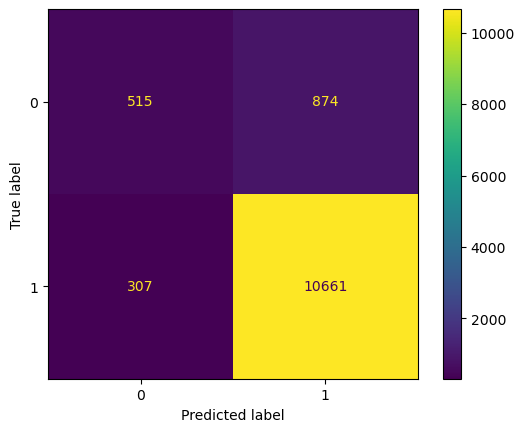

In [20]:
confusion_mat = confusion_matrix(y_test, grid.predict(X_test), labels=[1, 0])
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1' ])
disp.plot()
plt.show()

In [21]:
precion = precision_score(y_test, grid.predict(X_test))
recall = recall_score(y_test, grid.predict(X_test))
accuracy = accuracy_score(y_test, grid.predict(X_test))
precion, recall, accuracy

(0.6265206812652068, 0.37077033837293016, 0.9044266407704136)

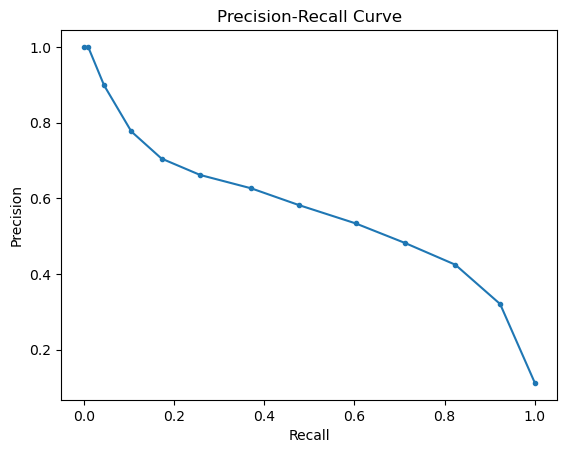

In [22]:
from sklearn.metrics import precision_recall_curve
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, grid.predict_proba(X_test)[:,1])

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


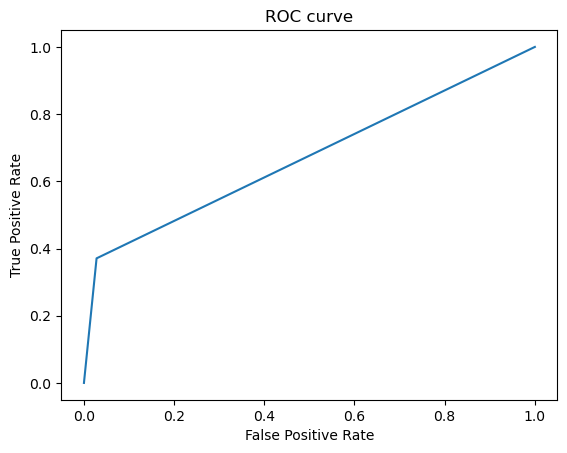

ROC AUC: 0.6713899102513812


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and y_scores are the scores predicted by the model
fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc = roc_auc_score(y_test, grid.predict(X_test))
print(f'ROC AUC: {auc}')

In [24]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

/Users/spatasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/spatasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/spatasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/spatasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/spatasha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has be

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=0.1, solver='newton-cg')
Best Score: 0.910166236413587


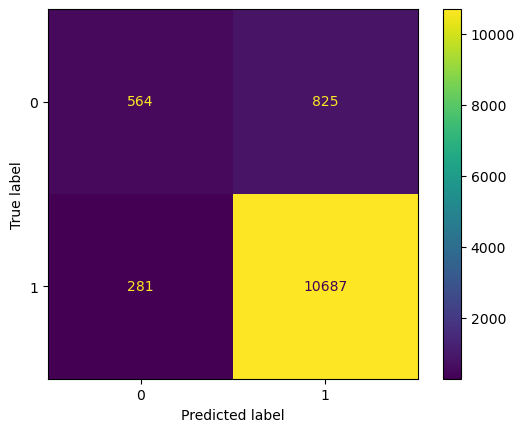

In [25]:
confusion_mat = confusion_matrix(y_test, grid_search.predict(X_test), labels=[1, 0])
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1' ])
disp.plot()
plt.show()

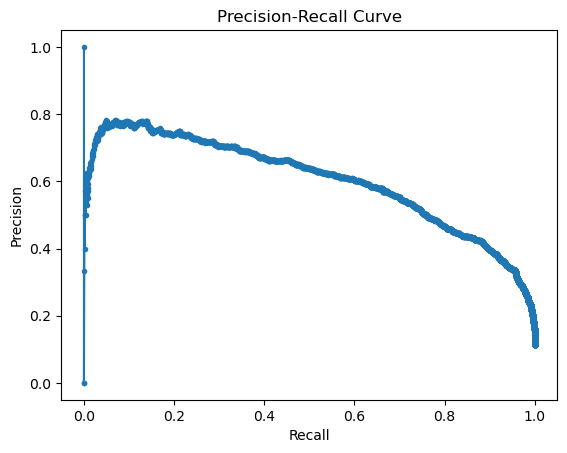

In [26]:
from sklearn.metrics import precision_recall_curve
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:,1])

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


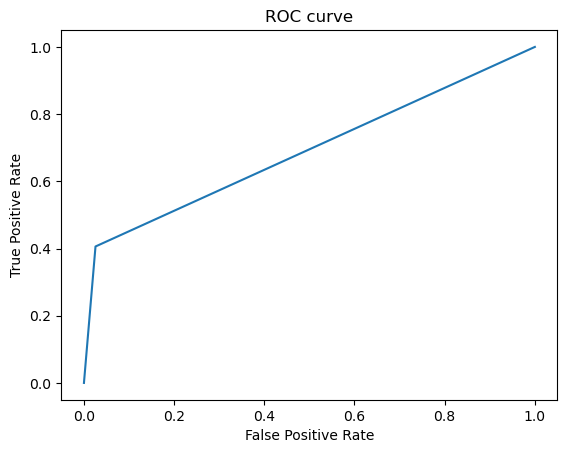

ROC AUC: 0.690213765393298


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and y_scores are the scores predicted by the model
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc = roc_auc_score(y_test, grid_search.predict(X_test))
print(f'ROC AUC: {auc}')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=3)
Best Score: 0.5737739219492409


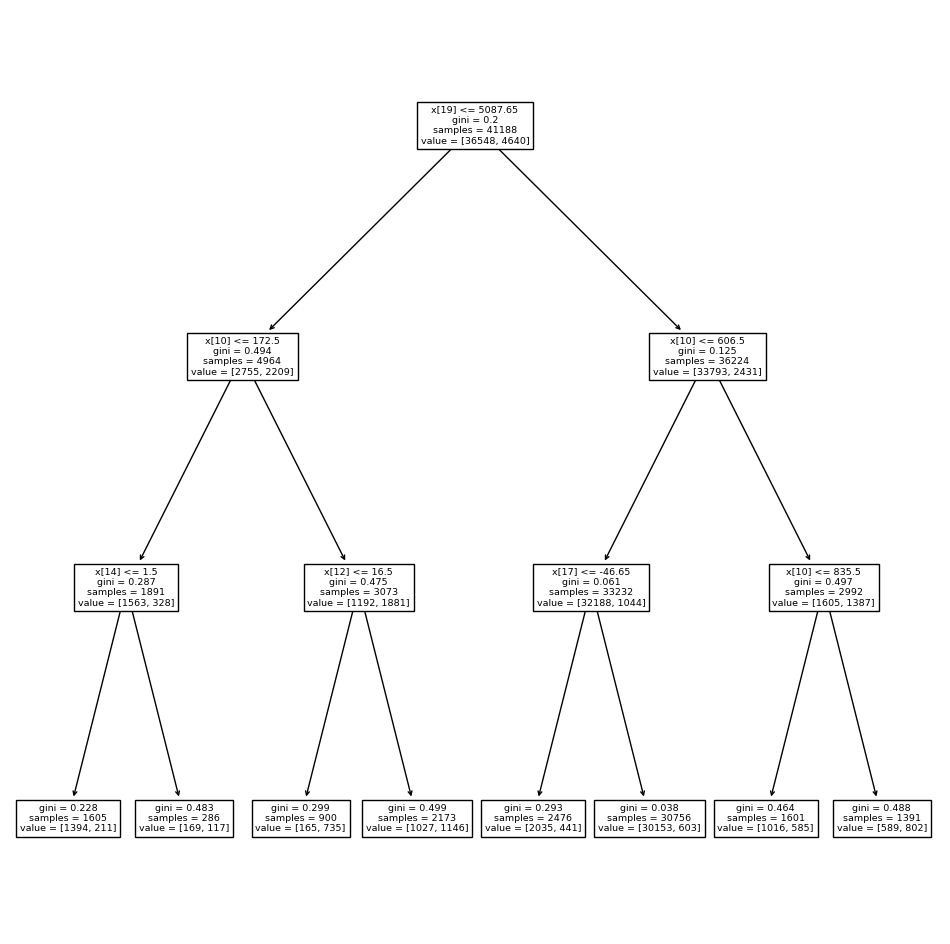

In [108]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters, best score, and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_
y_pred = grid_search.predict(X)
accuracy = accuracy_score(y, y_pred)
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(grid_search.best_estimator_, ax=ax)
plt.show()


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Create the SVM classifier
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

# Evaluate the optimized model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set: ", accuracy)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Estimator: SVC(C=0.1, gamma=0.1, kernel='linear')
Best Score: 0.9021244309559939
Accuracy on Test Set:  0.9030104394270454


|  Model | Best Parameters | Best Estimator | Best Score |
| ----- | ---------- | -------------  | -----------   |
|  KNN  | Best Parameters: {'knn__n_neighbors': 11} |Estimator: Pipeline(steps=[('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors=11))]) | 90.04%    |
|  Logistic Regression  | {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} |LogisticRegression(C=0.1, solver='newton-cg')  | 91.01%    |
|  Decision Trees  | {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} |DecisionTreeClassifier(max_depth=3)   | 57.37%    |
|  SVM | {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'} |{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}   | 90.2%    |                

##### Questions